<a href="https://colab.research.google.com/github/SourabhShetye/tusk/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
py.offline.init_notebook_mode(connected=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [47]:
df_census = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [48]:
df_census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [49]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
df_census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [51]:
df_census.isnull().sum()

,0
Age,0
Workclass,0
Fnlwgt,0
Education,0
Education_num,0
Marital_status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [52]:
df_census['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [53]:
df_census['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [54]:
df_census.loc[df_census.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [55]:
df_census.loc[df_census.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [56]:
df_census.drop(df_census[df_census['Native_country'] == ' ?'].index,inplace=True)
# droping the bull values from both the columns
df_census.drop(df_census[df_census['Occupation'] == ' ?'].index,inplace=True)

In [57]:
df_census['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [58]:
df_census.drop(df_census[df_census['Occupation'] == ' ?'].index,inplace=True)  # removeing the unnamed values

<Axes: xlabel='Income'>

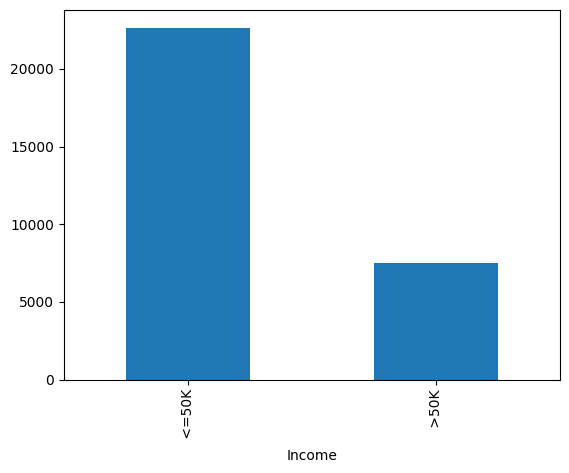

In [59]:
df_census['Income'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

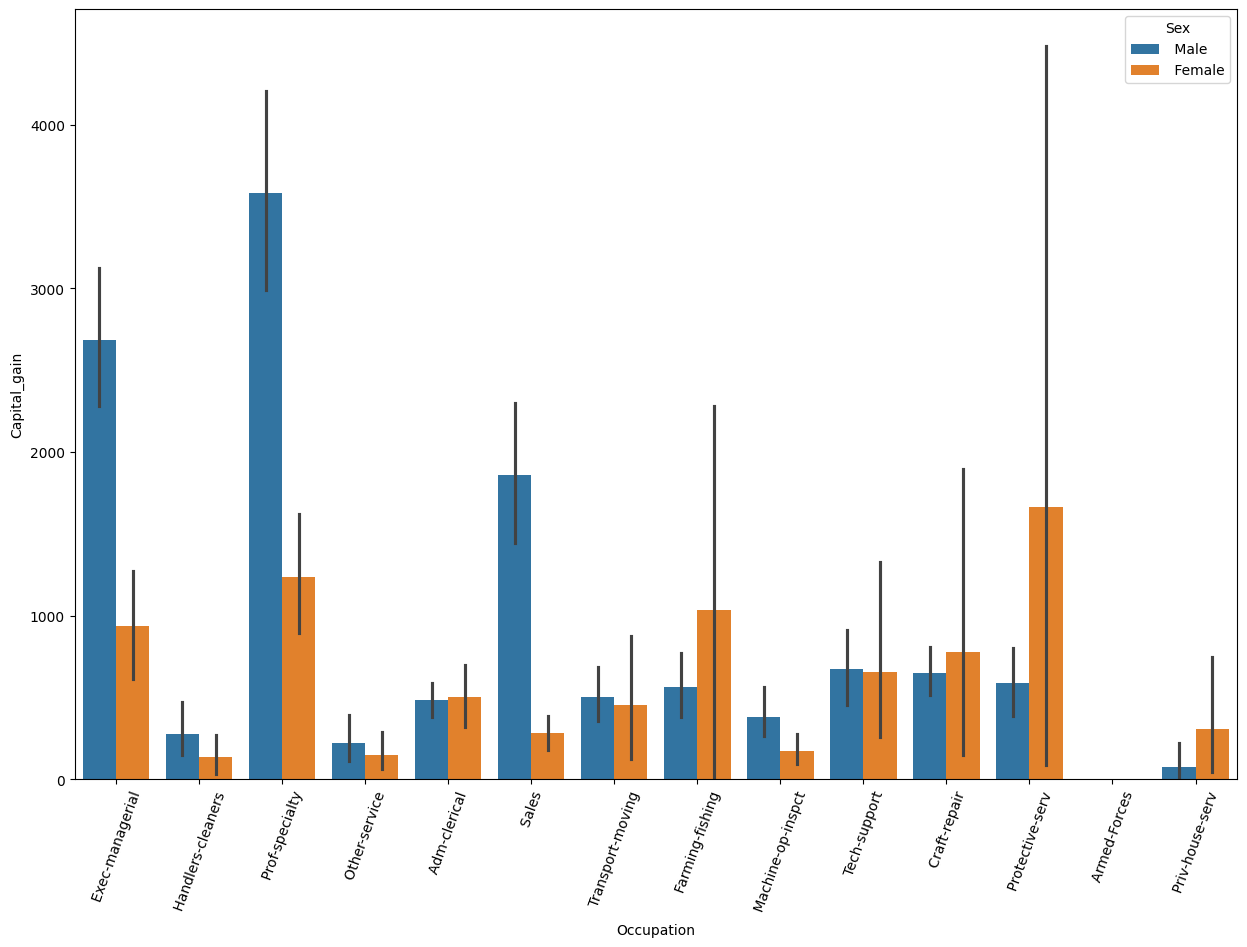

In [60]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=df_census,hue='Sex')
plt.xticks(rotation=70)
##Checking the distribution of Capital_gain and  Occupation as per gender##

<Axes: xlabel='Education', ylabel='Hours_per_week'>

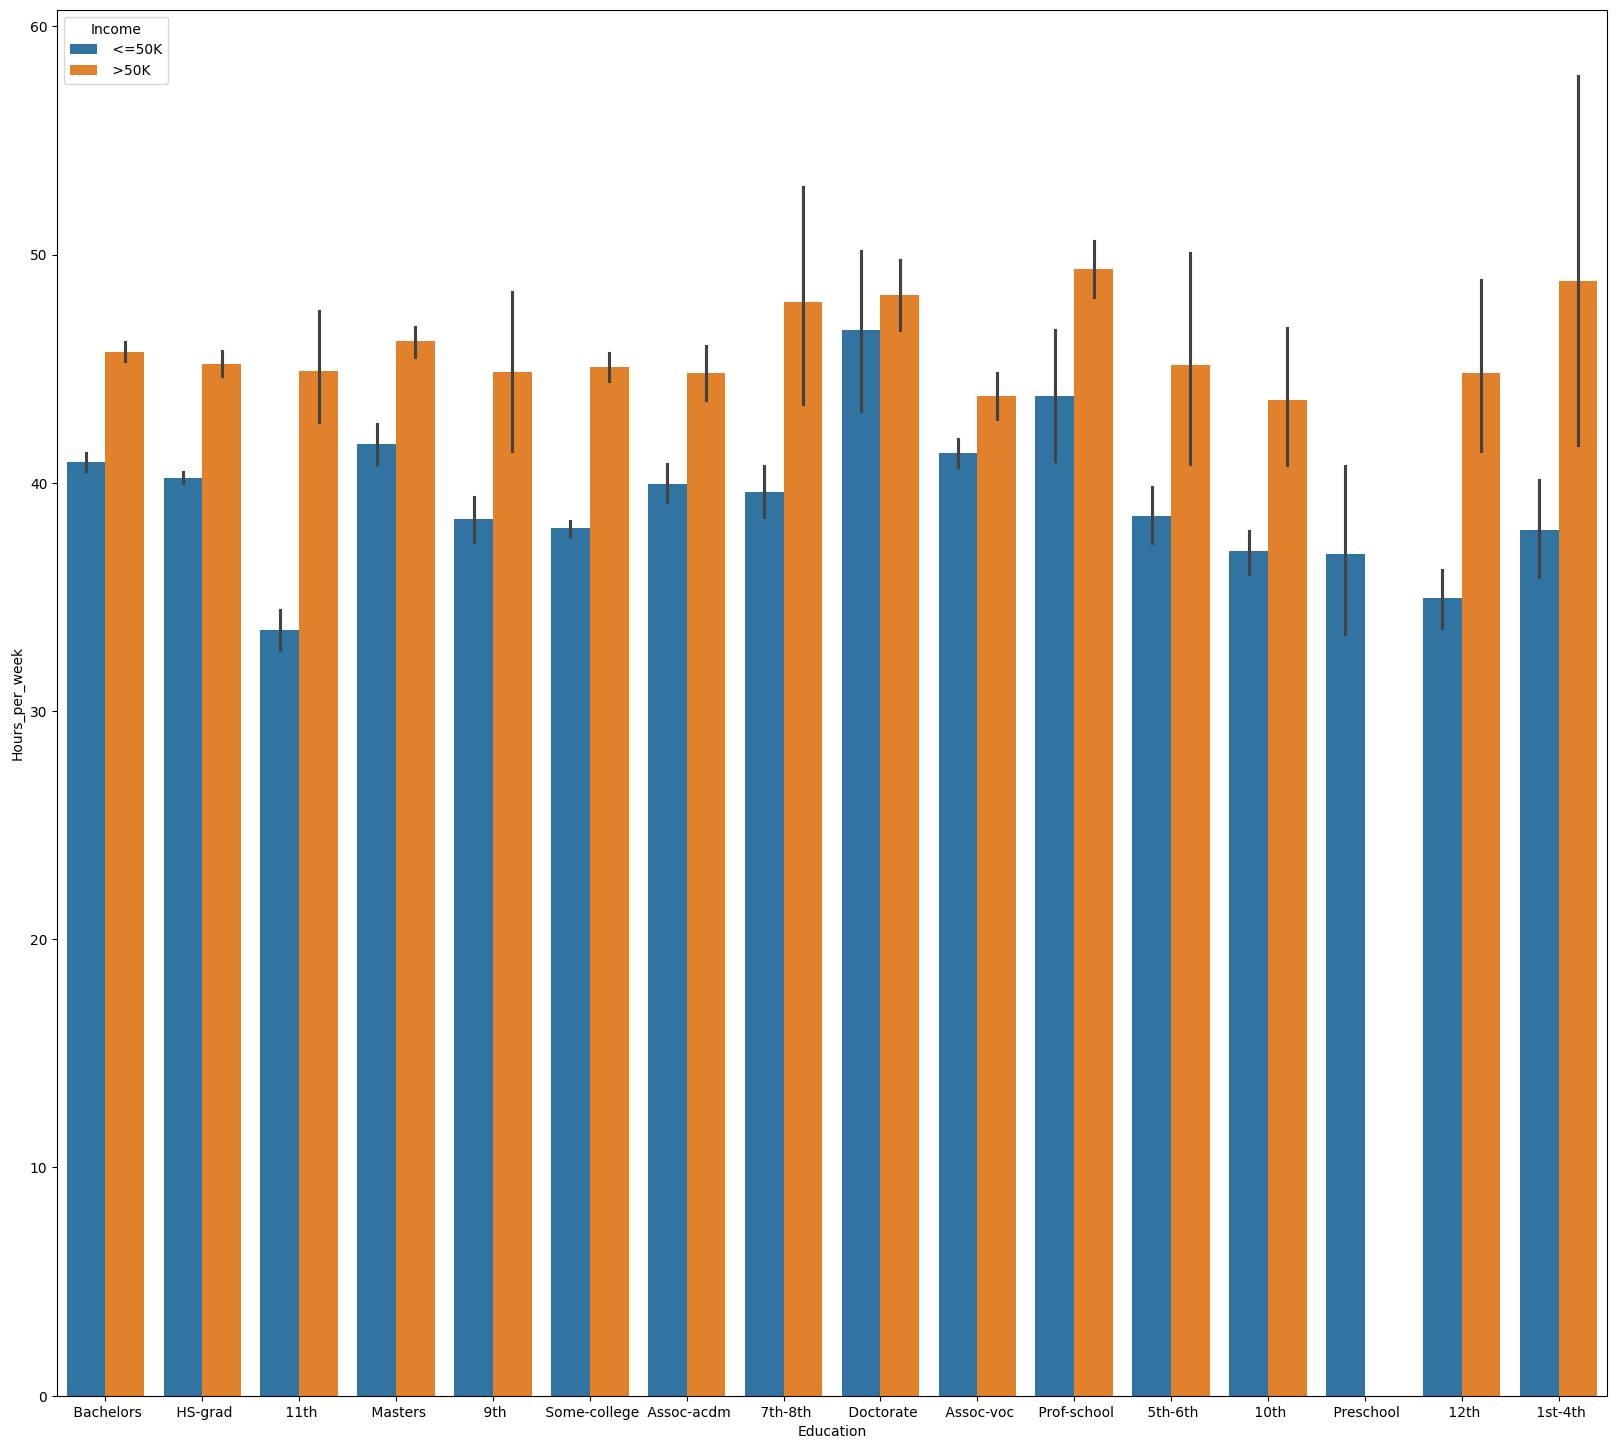

In [61]:
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=df_census,hue='Income')
##Checking the distribution of Education and  Hours_per_week as gender###

In [62]:
le = LabelEncoder() # label encoder
df_census['Income']=le.fit_transform(df_census['Income'])
df_census['Sex']=le.fit_transform(df_census['Sex'])
#Converting 2 columns into binary
df_census = pd.get_dummies(df_census,drop_first=True)
pd.set_option('display.max_columns',100)#to display all columns
pd.set_option('display.max_columns',100)#to display all columns

In [63]:
df_census.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,38,215646,9,1,0,0,40,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,53,234721,7,1,0,0,40,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,28,338409,13,0,0,0,40,0,False,True,False,False,False,False,False,False,False,False,False,False,False,Fals

In [64]:
scaler = StandardScaler()
train_col_sacle = df_census[['Age','Fnlwgt','Education_num','Hours_per_week']]
train_scaler_col = scaler.fit_transform(train_col_sacle)
train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)
df_census['Age']= train_scaler_col['Age']
df_census['Fnlwgt']= train_scaler_col['Fnlwgt']
df_census['Education_num']= train_scaler_col['Education_num']
df_census['Hours_per_week']= train_scaler_col['Hours_per_week']

In [65]:
X = df_census.drop(['Income'],axis=1)
y = df_census['Income']

In [66]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=11)

In [67]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier
svm=SVC()              # support vactor classifier
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier
print("Model is created")

Model is created


In [68]:
# Find columns with NaNs in X_train
cols_with_nan = X_train.columns[X_train.isnull().any()].tolist()

# Drop the same columns from both train and test sets
X_train = X_train.drop(columns=cols_with_nan)
X_test = X_test.drop(columns=cols_with_nan)



In [69]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [70]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))
print("xgboost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.8435960591133005
knn classification score 0.870215990905646
dt classification score 0.8966464569912845
rf classification score 0.8966464569912845
adb classification score 0.8440223569533915
svm classification score 0.7958980674497916
gdboost classification score 0.8593690791966654
xgboost classification score 0.8757104964001515


In [71]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)
xgboost_yprad = xgboost.predict(X_test)

In [73]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[6283  537]
 [ 933 1296]]


In [74]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[6334  486]
 [ 871 1358]]


In [75]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[6258  562]
 [ 880 1349]]


In [76]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[6285  535]
 [ 884 1345]]


In [77]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[6455  365]
 [1071 1158]]


In [78]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[6614  206]
 [1641  588]]


In [79]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[6393  427]
 [ 907 1322]]


In [80]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[6392  428]
 [ 854 1375]]


In [81]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)


xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      6820
           1       0.71      0.58      0.64      2229

    accuracy                           0.84      9049
   macro avg       0.79      0.75      0.77      9049
weighted avg       0.83      0.84      0.83      9049

 knn classification_report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6820
           1       0.74      0.61      0.67      2229

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.85      9049

 dt classification_report 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6820
           1       0.71      0.61      0.65      2229

    accuracy                           0.84      9049
   macro avg       0.79      0.76      0.77

In [84]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import RocCurveDisplay
#importing the ric and auc from sklearn and predect the x_test and checking the roc_auc_score
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.7513438228944241
0.7689904077022559
0.761399717664642
0.762481926458612
0.7329982081045773
0.6167950726822781
0.7652405507776062
0.7770559763396129


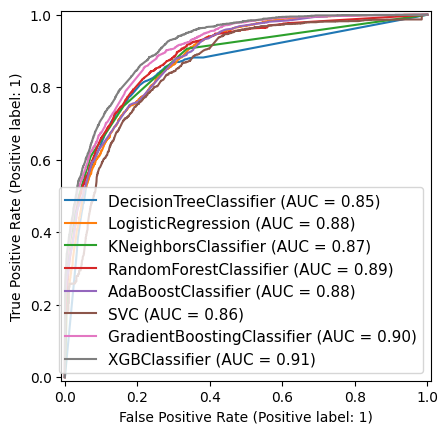

In [86]:
#lets find roc curve to check best fittted model
# Create an initial ROC plot for the first model
disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)

# Plot ROC curves for other models on the same axis
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(adb, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svm, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gdboost, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(xgboost, X_test, y_test, ax=disp.ax_)

# Adjust legend and show the plot
plt.legend(prop={'size': 11}, loc='lower right')
plt.show()

In [87]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [91]:
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())


Missing values in X: 0
Missing values in y: 0


In [90]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Or "median" for robustness
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [92]:
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5).mean())

Mean of Cross validation score for gdboost  model => 0.8554094060914309
Cross validation score for xgboost model => 0.8584928780302501


In [93]:
from sklearn.model_selection import GridSearchCV
xgboost.get_params().keys()  # to check the parameters
parm_grid  = {'max_depth' : [3,4],
              'subsample' : [0.5,0.8],
              'learning_rate': [0.1],
              'min_child_weight' : [1,2],
              'random_state' : [4,5]}
parm_grid
{'max_depth': [3, 4],
 'subsample': [0.5, 0.8],
 'learning_rate': [0.1],
 'min_child_weight': [1, 2],
 'random_state': [4, 5]}

#giving above parameters to our model and behalf of this will train it again.
gridsearch = GridSearchCV(xgboost, param_grid = parm_grid , cv=5)
#fit the model using given paramters
gridsearch.fit(X_train,y_train)
#traning the model now

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'min_child_weight': [1, 2], 'random_state': [4, 5],
                         'subsample': [0.5, 0.8]})

In [94]:
gridsearch.best_params_
#printing the best parameters

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2,
 'random_state': 5,
 'subsample': 0.8}

In [96]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Define and train XGBoost model with best hyperparameters
xgboost_tuning = XGBClassifier(
    learning_rate=0.1,
    max_depth=4,
    min_child_weight=2,
    random_state=4,
    subsample=0.8
)

xgboost_tuning.fit(X_train, y_train)  # Train the model

# Predict using the test data
xgboost_tuning_yprad = xgboost_tuning.predict(X_test)

# Print classification report
xgboost_report = classification_report(y_test, xgboost_tuning_yprad)
print("XGBoost Classification Report:\n", xgboost_report)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      6820
           1       0.77      0.58      0.66      2229

    accuracy                           0.85      9049
   macro avg       0.82      0.76      0.79      9049
weighted avg       0.85      0.85      0.85      9049



In [97]:
import pickle
Census_model = 'Census_model.pickle'
pickle.dump(xgboost_tuning,open(Census_model,'wb'))